In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Visualizing the rewards matrix

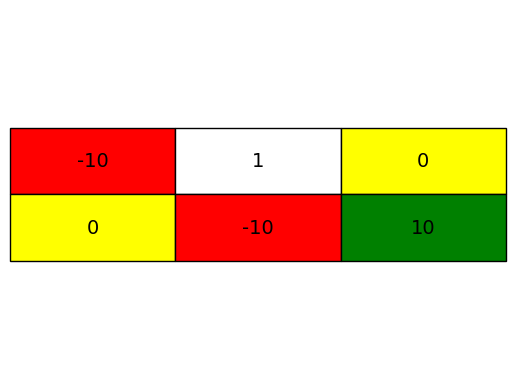

In [2]:
## Step 0:Visualize the rewards matrix

#Define the rewards matrix with starting option as -10
rewards = np.array([
    [-10, 1, 0],
    [0, -10, 10]
])

# Define the corresponding colors for each value
colors = [["red", "white", "yellow"], ["yellow", "red", "green"]]
# Create a figure and axis
fig, ax = plt.subplots()
# Create a table-like visualization of the rewards matrix with colored cells
table = ax.table(cellText=rewards, cellLoc='center', loc='center', cellColours=colors)
# Set the table properties
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(1, 4)
# Remove the axis
ax.axis('off')

# Show the plot of reward matrix
plt.show()

## Defining the Environment and initializing the Q-table

In [3]:
## Step 1: Define the environment
grid_rows = 2
grid_cols = 3
num_actions = 4 # Up, Down, Right, Left
states = grid_rows*grid_cols
environment = rewards

## Step 2: Define and initialize the Q-table
q_table = np.zeros((states, num_actions))
print(q_table)


[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
print(environment)

[[-10   1   0]
 [  0 -10  10]]


## Implementing the Q_learning algorithm 

In [5]:
## Step 3: Define the Q-learning algorithm

# Set hyper-parameters
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.1  # exploration rate
total_episodes = 20000

# Mapping state and action
# Mapping from (row, col) coordinates to state index
state_mapping = {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5}

for episode in range(total_episodes):
    # state = (0,0) # Start state
    state = state_mapping[(0, 0)]  # Start state
    terminated = False

    num_moves = 0 #initialize the mumber of moves
    while not terminated:
        
        # Choose an action based on epsilon-greedy policy
        if np.random.random() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(q_table[state])
            
        # Convert the state index to (row, col) coordinates
        row = state // rewards.shape[1]
        col = state % rewards.shape[1]
        
        # Perform the action and observe the next state and reward
        if action == 0:  # Up
            next_state = state_mapping[max(row - 1, 0), col]
        elif action == 1:  # Down
            next_state = state_mapping[min(row + 1, rewards.shape[0] - 1), col]
        elif action == 2:  # Right
            next_state = state_mapping[row, min(col + 1, rewards.shape[1] - 1)]
        elif action == 3:  # Left
            next_state = state_mapping[row, max(col - 1, 0)]
        
        reward = rewards[next_state // rewards.shape[1], next_state % rewards.shape[1]] #converting next_state into (row,col) before stoting it state
        
        # Update the Q-value of the current state-action pair
        q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
        
        state = next_state
        
        # Check if the episode is over
        if reward == 10 or num_moves >= num_actions:
            terminated = True
            
        num_moves += 1

# Round the Q-values to two decimal places and display it
q_table_rounded = np.round(q_table, 2)
print(q_table_rounded)


[[-1.    0.   10.   -1.  ]
 [10.   -1.    9.   -1.  ]
 [ 8.83  9.82  8.8  10.  ]
 [-1.    0.   -1.02  0.  ]
 [10.   -0.95  9.77  0.  ]
 [ 0.    0.    0.    0.  ]]


## Visualizing the Q_table with matplotlib

<Axes: title={'center': 'Q-Table'}>

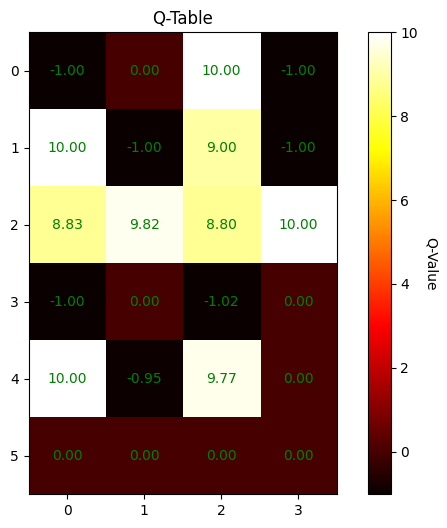

In [6]:
# Step 5: Visualize the Q-table using matplotlib
actions = ['Up', 'Down', 'Right', 'Left']

fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(q_table_rounded, cmap='hot')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Q-Value', rotation=-90, va="bottom")

# Add text annotations
for i in range(q_table_rounded.shape[0]):
    for j in range(q_table_rounded.shape[1]):
        text = ax.text(j, i, f'{q_table_rounded[i, j]:.2f}', ha='center', va='center', color='green')

# Set title and labels
ax.set_title('Q-Table')
ax
